### a)
Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse nach obigem Schema zur Verfügung stellt.



Die Implementierung liegt im gleichen Directory wie vorliegendes Notebook im file pca.py vor

import des Moduls erfolgt dabei als: from pca import PCA

### b)
 Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz Boston Housing. Lassen Sie dabei die Variable TGT weg. Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von müssen dafür quadriert und durch n − 1 geteilt werden. Warum?), dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten Komponenten zusammen erklären. Wieviele Dimensionen können Sie weglassen, wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pca import PCA

plt.style.use("default")

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
        'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols,
                     index_col=False)
tgt = boston.TGT
# boston.drop(columns="TGT", inplace=True)


In [3]:
pca = PCA(standardize=True, center=True)
pca.fit(boston.drop(columns="TGT"))

scores = pca.get_principal_component_scores()
explained_variance = pca.get_explained_variance()

cumulated_explained_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

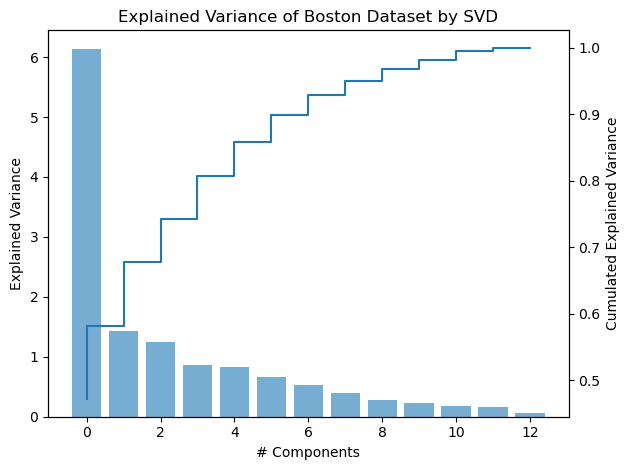

In [49]:
n_components = scores.shape[1]

fig, ax1 = plt.subplots()
color = "tab:blue"
ax1.set_xlabel("# Components")
ax1.set_ylabel("Explained Variance")
ax1.bar(range(n_components), explained_variance,
        align="center", alpha=.6, color=color)

ax2 = ax1.twinx()
ax2.set_ylabel("Cumulated Explained Variance")
ax2.step(range(n_components), cumulated_explained_variance, color=color)
ax1.set_title("Explained Variance of Boston Dataset by SVD")
ax2.grid(False)
plt.tight_layout()
plt.show()


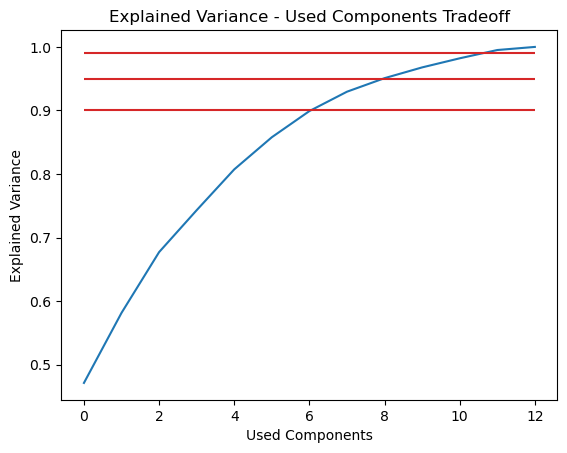

In [50]:
plt.plot(cumulated_explained_variance, c="tab:blue")
plt.hlines(0.9, 0, 12, colors="tab:red")
plt.hlines(0.95, 0, 12, colors="tab:red")
plt.hlines(0.99, 0, 12, colors="tab:red")
plt.xlabel("Used Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance - Used Components Tradeoff")
plt.show()

Benötigte Dimensionen für 90 % Varianz: 6.
Benötigte Dimensionen für 95 % Varianz: 8.
Benötigte Dimensionen für 99 % Varianz: 13.

### c)
 Berechnen Sie die Matrix der Korrelationskoeffizienten für die transformierten Variablen und interpretieren Sie das Ergebnis.

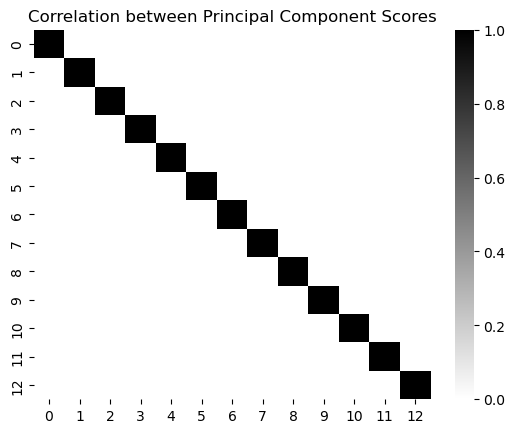

In [61]:
sns.heatmap(
    np.corrcoef(scores, rowvar=False),
    cmap="binary"
)
plt.title("Correlation between Principal Component Scores")
plt.show()


Da die Hauptkomponenten orthogonal zueinander sind, sind diese folglich auch unkorreliert

### d)
 Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.

In [25]:
var_correlation = []

for i in range(10):
    var_correlation.append(
        np.corrcoef(scores[:, i], boston, rowvar=False)[0, :]
    )

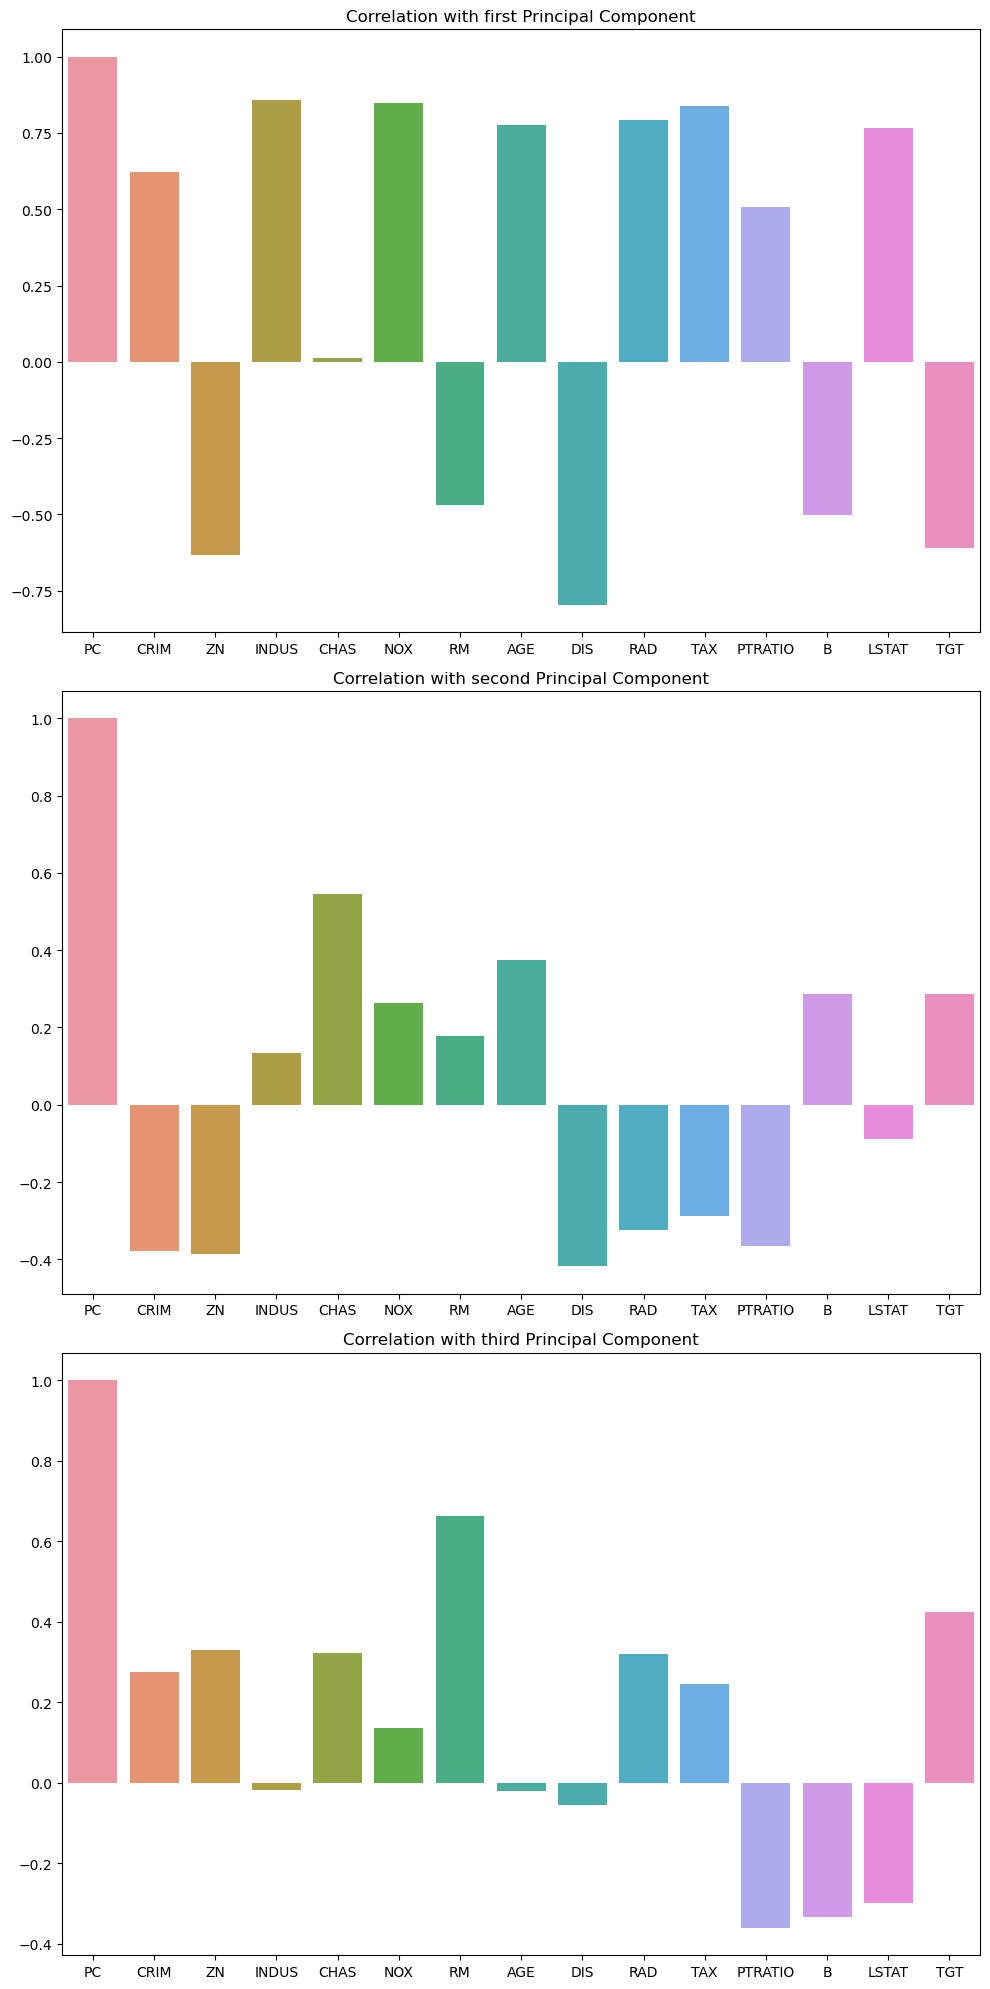

In [54]:
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 20)

cols = ["PC"] + list(boston.columns)

sns.barplot(x = cols, y = var_correlation[0], ax=axs[0])
sns.barplot(x = cols, y = var_correlation[1], ax=axs[1])
sns.barplot(x = cols, y = var_correlation[2], ax=axs[2])

axs[0].title.set_text("Correlation with first Principal Component")
axs[1].title.set_text("Correlation with second Principal Component")
axs[2].title.set_text("Correlation with third Principal Component")

fig.tight_layout()

plt.show()


### e)
Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb. Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

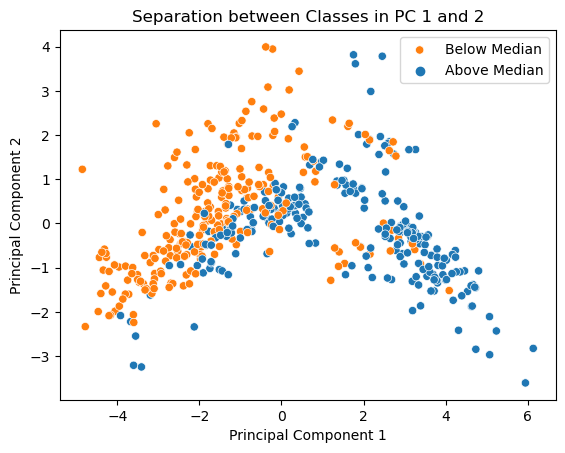

In [57]:
median_price = [1 if price >= np.median(tgt) else 0 for price in tgt]

sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=median_price)

plt.title("Separation between Classes in PC 1 and 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(labels=["Below Median", "Above Median"])

plt.show()

Die ersten beiden Hauptkomponenten sind nur bedingt hilfreich für eine Classification, so liegt hier noch ein relativ
starker Overlap zwischen den beiden Klassen vor, dementsprechend ist noch keine lineare Seperation erreicht.

In [16]:
% load_ext version_information


In [17]:
% version_information numpy, pandas, matplotlib


Software versions
Python 3.10.4 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.4.0
OS Windows 10 10.0.19044 SP0
numpy 1.22.3
pandas 1.4.3
matplotlib 3.5.2
Wed Oct 19 11:49:54 2022 Mitteleuropäische Sommerzeit